1.  Sex: male or female(Nominal)
2.  Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral
3.  Current Smoker: whether or not the patient is a current smoker (Nominal) 
4.  Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history) 
5.  BP Meds: whether or not the patient was on blood pressure medication (Nominal) 
6.  Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) 
7.  Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 
8.  Diabetes: whether or not the patient had diabetes (Nominal) Medical(current) 
9.  Tot Chol: total cholesterol level (Continuous) 
10. Sys BP: systolic blood pressure (Continuous) 
11. Dia BP: diastolic blood pressure (Continuous) 
12. BMI: Body Mass Index (Continuous) 
13. Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 
14. Glucose: glucose level (Continuous) Predict variable (desired target) 
15. 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [1]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv('framingham.csv')
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [3]:
data['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [4]:
before_missing_values = data.shape

In [5]:
data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


# MISSING VALUES

In [7]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F75E28880>,
      dtype=object)

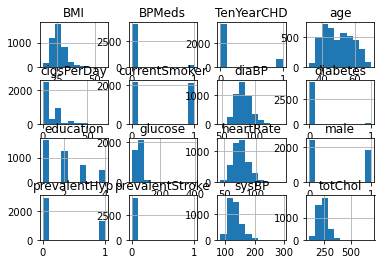

In [8]:
data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F763E6640>,
      dtype=object)

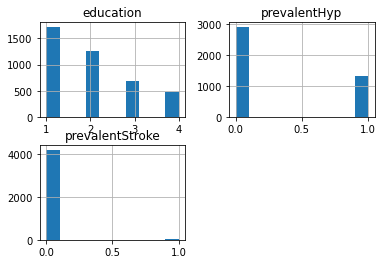

In [9]:
data[['prevalentStroke','prevalentHyp','education']].hist()

In [10]:
per = (data.isnull().sum() * 100 / data.isnull().count())
per.sort_values(ascending = False)

glucose            9.150943
education          2.476415
BPMeds             1.250000
totChol            1.179245
cigsPerDay         0.683962
BMI                0.448113
heartRate          0.023585
TenYearCHD         0.000000
diaBP              0.000000
sysBP              0.000000
diabetes           0.000000
prevalentHyp       0.000000
prevalentStroke    0.000000
currentSmoker      0.000000
age                0.000000
male               0.000000
dtype: float64

In [11]:
data_new = data.dropna(axis = 0)

In [12]:
data_new = data_new.drop(['education','prevalentStroke','prevalentHyp'], axis = 1)

In [13]:
after_missing_values = data_new.shape

In [14]:
import operator
tuple(map(operator.sub,before_missing_values,after_missing_values))

(582, 3)

In [15]:
data_new.isnull().sum()

male             0
age              0
currentSmoker    0
cigsPerDay       0
BPMeds           0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

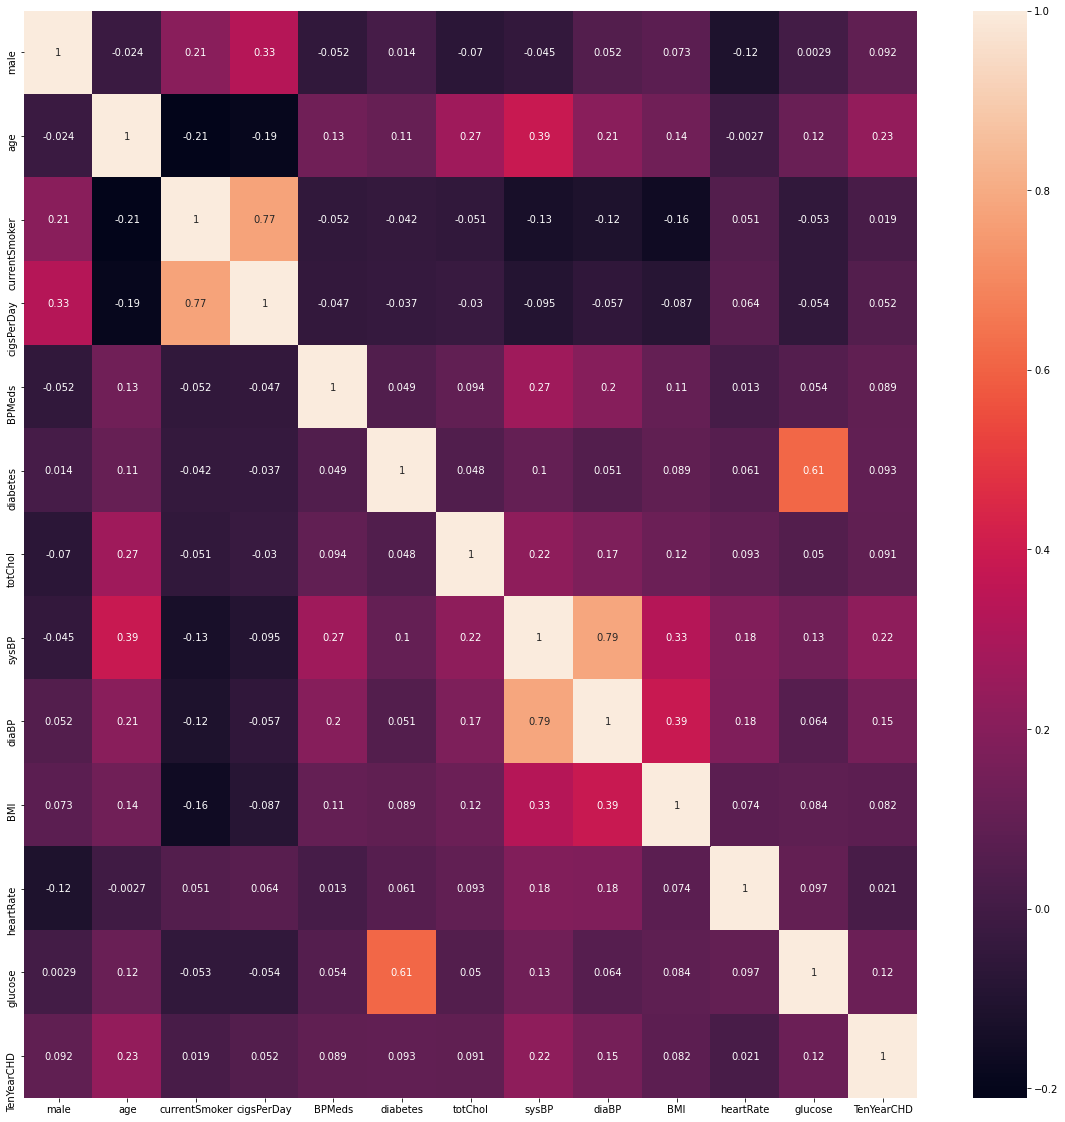

In [16]:
plt.rcParams['figure.figsize'] = [20,20]
sns.heatmap(data_new.corr(), annot= True)

# OUTLIERS

In [17]:
data_new.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD'],
      dtype='object')

In [18]:
data_new.shape

(3658, 13)

In [19]:
data_new = data_new[data_new['glucose'] < 150]
data_new = data_new[data_new['totChol'] < 250]
data_new = data_new[data_new['sysBP'] < 220]

In [20]:
data_new.shape

(2303, 13)

In [21]:
data_new.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD'],
      dtype='object')

In [22]:
plt.rcParams['figure.figsize'] = [10,5]

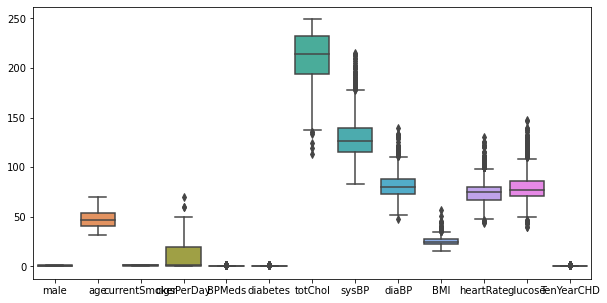

In [23]:
sns.boxplot(data = data_new)

In [24]:
data_new.shape

(2303, 13)

In [26]:
!pip install imblearn

In [27]:
data_new

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
5,0,43,0,0.0,0.0,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0,0.0,0.0,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,0,0.0,0.0,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4234,1,51,1,43.0,0.0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [28]:
data_0 = data_new[data_new['TenYearCHD'] == 0]
data_1 = data_new[data_new['TenYearCHD'] == 1]

In [29]:
print(data_0.shape,data_1.shape)

(2003, 13) (300, 13)


In [30]:
x = data_new.drop(['TenYearCHD'], axis = 1)
y = pd.DataFrame(data_new['TenYearCHD'])

In [31]:
from imblearn.over_sampling import RandomOverSampler
random = RandomOverSampler(random_state= 0)
x,y = random.fit_resample(x,y)

In [32]:
new_data_1 = pd.concat([x,y], axis = 1)

In [33]:
new_data_1['TenYearCHD'].value_counts()

1    2003
0    2003
Name: TenYearCHD, dtype: int64

# LOGISTIC REGRESSION

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = .3, random_state = 1)
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(1202, 12)
(2804, 12)
(2804, 1)
(1202, 1)


In [35]:
from sklearn.linear_model import LogisticRegression
mdl = LogisticRegression()
mdl_training = mdl.fit(x_train,y_train)


In [47]:
y_predict_test = mdl_training.predict(x_test)
y_predict_train = mdl_training.predict(x_train)

In [50]:
accuracy_score(y_test,y_predict_test)

0.6688851913477537

In [51]:
accuracy_score(y_train,y_predict_train)

0.666191155492154

# CONFUSION MATRICS

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)


In [38]:
from matplotlib.colors import ListedColormap
plt.rcParams['figure.figsize'] = [10,5]

(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

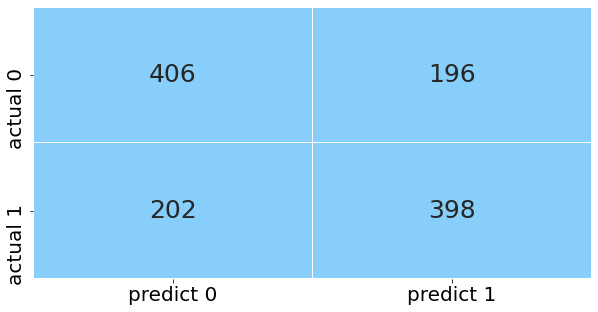

In [39]:
cm_df = pd.DataFrame(data = cm, columns = ['predict 0', 'predict 1'], index = ['actual 0', 'actual 1'])
sns.heatmap(cm_df, annot = True, annot_kws={'size':25}, cbar =False,fmt = 'd', linewidth = 0.2,cmap = ListedColormap(['lightskyblue']))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

In [40]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [41]:
print('accuracy_score :', accuracy_score(y_test,y_predict))
print('precision_score :', precision_score(y_test,y_predict))
print('recall_score :', recall_score(y_test,y_predict))
print('f1_score :', f1_score(y_test,y_predict))

accuracy_score : 0.6688851913477537
precision_score : 0.67003367003367
recall_score : 0.6633333333333333
f1_score : 0.6666666666666666


In [ ]:
accuracy_score(y_train,y_predict)

# ROC CURVE

In [42]:
from sklearn.metrics import auc,roc_auc_score,roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_predict)
print(fpr)
print(tpr)
print(thresholds)

[0.        0.3255814 1.       ]
[0.         0.66333333 1.        ]
[2 1 0]


In [43]:
auc_score = roc_auc_score(y_test,y_predict)
round(auc_score,3) 

0.669

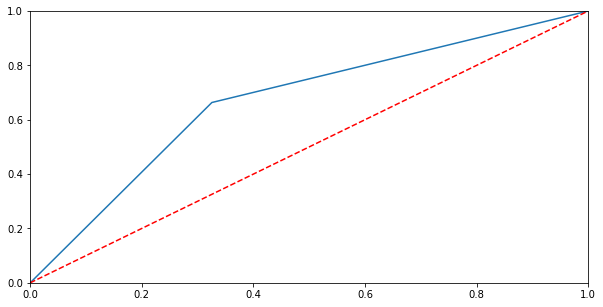

In [44]:
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')


In [45]:
result = pd.DataFrame({'model':['logistic regression'], 
                       'accuracy_score':[accuracy_score(y_test,y_predict)],
                        'precision_score':[precision_score(y_test,y_predict)],
                        'recall_score':[recall_score(y_test,y_predict)],
                     'f1_score':[f1_score(y_test,y_predict)],
                      'auc_score':[roc_auc_score(y_test,y_predict)]})

In [46]:
result

,model,accuracy_score,precision_score,recall_score,f1_score,auc_score
0,logistic regression,0.668885,0.670034,0.663333,0.666667,0.668876


In [ ]:
FEATURE SELECTIN - 1

In [63]:
k = [SGDClassifier,LogisticRegression]

In [73]:
y_predict = mdl_training.predict(x_test)

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_test,y_predict)

0.6572379367720466